In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [2]:
df_train = joblib.load(r'..\assets\combined\train_impute.pkl')
df_test = joblib.load(r'..\assets\combined\test_impute.pkl')

In [3]:
df_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595694 entries, 0 to 2595693
Data columns (total 140 columns):
 #    Column                                             Non-Null Count    Dtype  
---   ------                                             --------------    -----  
 0    user_id                                            2595694 non-null  object 
 1    app_id                                             2595694 non-null  int64  
 2    relevance_score                                    2595694 non-null  float64
 3    user_country_code                                  2595694 non-null  object 
 4    user_has_coordinates                               2595694 non-null  bool   
 5    user_latitude                                      2595694 non-null  float64
 6    user_longitude                                     2595694 non-null  float64
 7    user_account_age_months                            2595694 non-null  float64
 8    game_name                                         

In [4]:
# Considering this project will not update the game database periodically, the temporary data is not useful
temp_cols = ['game_avg_playtime_last_2weeks', 'game_median_last_2weeks']
df_train.drop(columns=temp_cols, inplace=True)
df_test.drop(columns=temp_cols, inplace=True)

In [5]:
# Convert to boolean dtype
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()
should_be_bool = [col for col in numerical_cols if set(df_train[col].unique()) == {0,1}]
df_train[should_be_bool] = df_train[should_be_bool].astype('bool')
df_test[should_be_bool] = df_test[should_be_bool].astype('bool')

In [6]:
# Convert release year to release since min(year)
min_year = df_train['game_released_year'].min()
df_train[f'game_released_year_since_{min_year}'] = df_train['game_released_year'] - min_year
df_test[f'game_released_year_since_{min_year}'] = df_test['game_released_year'] - min_year

df_train.drop(columns=['game_released_year'], inplace=True)
df_test.drop(columns=['game_released_year'], inplace=True)

In [7]:
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()

In [8]:
# Exclude these numerical columns
for col in ['app_id', 'relevance_score']:
    numerical_cols.remove(col)

In [9]:
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_train[numerical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
user_latitude,2595694.00,39.87,19.18,-62.19,37.09,42.61,51.17,71.71
user_longitude,2595694.00,1.35,64.21,-178.14,-10.94,9.49,20.48,178.07
user_account_age_months,2595694.00,184.25,37.70,50.97,156.69,178.29,209.21,258.28
game_RAWG_weighted_avg_rating,2595694.00,2.50,1.48,0.00,1.75,3.00,3.65,4.83
game_RAWG_ratings_count,2595694.00,305.37,656.07,0.00,7.00,44.00,257.00,6816.00
game_RAWG_reviews_with_text_count,2595694.00,1.87,5.23,0.00,0.00,0.00,1.00,83.00
game_RAWG_bookmark_count,2595694.00,2125.47,3085.54,0.00,213.00,824.00,2596.00,21513.00
game_metacritic_rating,2595694.00,76.47,6.68,23.00,77.00,77.00,77.00,97.00
game_RAWG_system_suggest_count,2595694.00,381.10,184.38,0.00,237.00,374.00,520.00,1725.00
game_RAWG_reviews_count,2595694.00,308.31,662.88,0.00,7.00,44.00,259.00,6928.00


<Axes: ylabel='Frequency'>

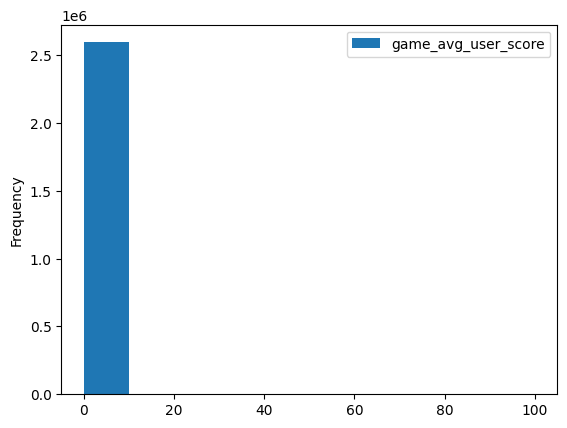

In [10]:
df_train[['game_avg_user_score']].plot(kind='hist')

<Axes: ylabel='Frequency'>

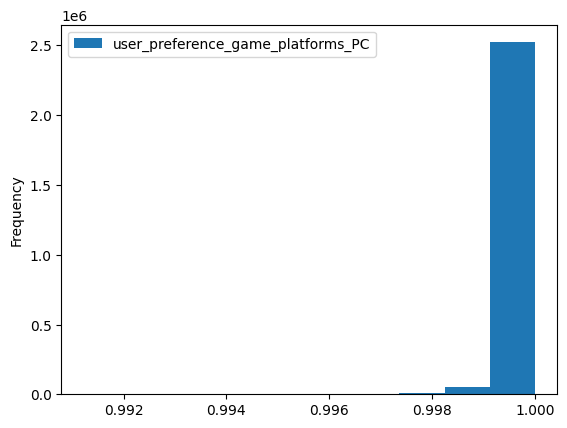

In [11]:
df_train[['user_preference_game_platforms_PC']].plot(kind='hist')

In [12]:
# Too skew, don't provide useful information
df_train.drop(columns=['game_avg_user_score', 'user_preference_game_platforms_PC'], inplace=True)
df_test.drop(columns=['game_avg_user_score', 'user_preference_game_platforms_PC'], inplace=True)
numerical_cols.remove('game_avg_user_score')
numerical_cols.remove('user_preference_game_platforms_PC')

## PowerTransform

In [13]:
# Calculate the skewness to identify which should be PowerTransform

def skewness_table(df, numerical_cols):
    """Return and display a skewness table in descending order"""

    skew_table = df[numerical_cols].skew().sort_values(ascending=False).to_frame(name='Skewness')
    skew_table['Skewness (abs)'] = skew_table['Skewness'].abs()
    skew_table = skew_table.sort_values('Skewness (abs)', ascending=False)

    with pd.option_context("display.max_rows", None):
        display(skew_table)

    return skew_table

skew_table = skewness_table(df_train, numerical_cols)

,Skewness,Skewness (abs)
game_median_playtime_forever,150.028461,150.028461
game_avg_playtime_forever,32.344708,32.344708
game_concurrent_user,24.406887,24.406887
game_positive_review_count,22.467123,22.467123
game_estimate_owners_upper,19.957515,19.957515
game_negative_review_count,19.316828,19.316828
game_popularity,19.207227,19.207227
game_estimate_owners_lower,17.554543,17.554543
user_preference_game_platforms_Neo Geo,8.953522,8.953522
game_RAWG_bookmark_type_toplay_count,7.483589,7.483589


In [14]:
# zero-variance columns in both train and test set have no information, so decide to drop
zero_var_cols_train = [col for col in numerical_cols if df_train[col].nunique() <= 1]
zero_var_cols_test = [col for col in numerical_cols if df_test[col].nunique() <= 1]

print(zero_var_cols_train, '\n', zero_var_cols_test)

['game_esrb_rating_Unknown', 'game_genres_Unknown', 'user_preference_game_esrb_rating_Unknown', 'user_preference_game_genres_Unknown', 'user_preference_game_platforms_Unknown'] 
 ['game_esrb_rating_Unknown', 'game_genres_Unknown', 'user_preference_game_esrb_rating_Unknown', 'user_preference_game_genres_Unknown', 'user_preference_game_platforms_Unknown']


In [15]:
df_train.drop(columns=zero_var_cols_train, inplace=True)
df_test.drop(columns=zero_var_cols_test, inplace=True)

for col in zero_var_cols_train:
    numerical_cols.remove(col)

In [16]:
# Apply PowerTransformer on columns where absolute skewness is greater than 1
cols_to_transform = skew_table[skew_table['Skewness (abs)'] > 1].index

pt = PowerTransformer(method='yeo-johnson', standardize=False)

df_train[cols_to_transform] = pt.fit_transform(df_train[cols_to_transform])

In [17]:
# Re-evaluate the skewness
_ = skewness_table(df_train, cols_to_transform)

,Skewness,Skewness (abs)
user_latitude,-0.876299,0.876299
game_RAWG_reviews_with_text_count,0.750391,0.750391
user_preference_game_platforms_3DO,0.748096,0.748096
user_preference_game_platforms_Neo Geo,0.641050,0.641050
user_preference_game_popularity,0.459624,0.459624
game_initial_price,-0.427370,0.427370
game_current_price,-0.395161,0.395161
user_preference_game_esrb_rating_Rating Pending,0.389628,0.389628
user_preference_game_duration,0.347988,0.347988
game_metacritic_rating,0.291764,0.291764


In [18]:
# Apply same PowerTransformer to test set
df_test[cols_to_transform] = pt.transform(df_test[cols_to_transform])
_ = skewness_table(df_test, cols_to_transform)

,Skewness,Skewness (abs)
game_RAWG_reviews_with_text_count,0.815250,0.815250
user_preference_game_platforms_Neo Geo,0.737476,0.737476
user_latitude,-0.715217,0.715217
user_preference_game_platforms_3DO,0.661266,0.661266
user_preference_game_genres_Massively Multiplayer,0.512247,0.512247
user_preference_game_genres_Simulation,-0.495786,0.495786
user_preference_game_popularity,0.465520,0.465520
game_initial_price,-0.432926,0.432926
user_preference_game_esrb_rating_Rating Pending,0.425189,0.425189
game_current_price,-0.401537,0.401537


## Standardization

In [19]:
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

In [20]:
numerical_cols = df_train.select_dtypes(include='number').columns.tolist()  # Include all numerical cols, in case anything is missed

# Note that app_id is just the game identifier and won't pass to the model
# relevance_score is [0, 1] min max scaled, done in previous work
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_train[numerical_cols].agg(['mean', 'std']).T)

,mean,std
app_id,473561.20,424208.86
relevance_score,0.28,0.35
user_latitude,-0.00,1.00
user_longitude,0.00,1.00
user_account_age_months,-0.00,1.00
game_RAWG_weighted_avg_rating,0.00,1.00
game_RAWG_ratings_count,-0.00,1.00
game_RAWG_reviews_with_text_count,-0.00,1.00
game_RAWG_bookmark_count,0.00,1.00
game_metacritic_rating,0.00,1.00


In [21]:
with pd.option_context("display.max_rows", None, 'display.float_format', '{:.2f}'.format):
    display(df_test[numerical_cols].agg(['mean', 'std']).T)

,mean,std
app_id,476756.13,425419.84
relevance_score,0.25,0.34
user_latitude,-0.08,1.09
user_longitude,0.22,1.13
user_account_age_months,0.02,0.99
game_RAWG_weighted_avg_rating,-0.05,1.03
game_RAWG_ratings_count,-0.06,1.01
game_RAWG_reviews_with_text_count,-0.03,0.99
game_RAWG_bookmark_count,-0.08,1.03
game_metacritic_rating,0.00,0.98


In [22]:
joblib.dump(df_train, r'..\assets\combined\train_scaled.pkl')
joblib.dump(df_test, r'..\assets\combined\test_scaled.pkl')

['..\\assets\\combined\\test_scaled.pkl']